In [24]:
import pandas as pd
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np
from mlxtend.plotting import heatmap
from matplotlib import pyplot as plt

In [ ]:
#Loading the data
columns = ['Overall Qual', 'Overall Cond','Gr Liv Area', 'Central Air','Total Bsmt SF','SalePrice']
df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', sep='\t', usecols=columns)
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [7]:
df.shape

(2930, 6)

In [ ]:
# Converting 'Central Air' from categorical to numerical
df['Central Air'] = df['Central Air'].map({'Y':1, 'N':0})

In [11]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

In [ ]:
#handling missing values by removing rows with missing values
df.dropna(axis=0)

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,1,1656,215000
1,5,6,882.0,1,896,105000
2,6,6,1329.0,1,1329,172000
3,7,5,2110.0,1,2110,244000
4,5,5,928.0,1,1629,189900
...,...,...,...,...,...,...
2925,6,6,1003.0,1,1003,142500
2926,5,5,864.0,1,902,131000
2927,5,5,912.0,1,970,132000
2928,5,5,1389.0,1,1389,170000


In [13]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

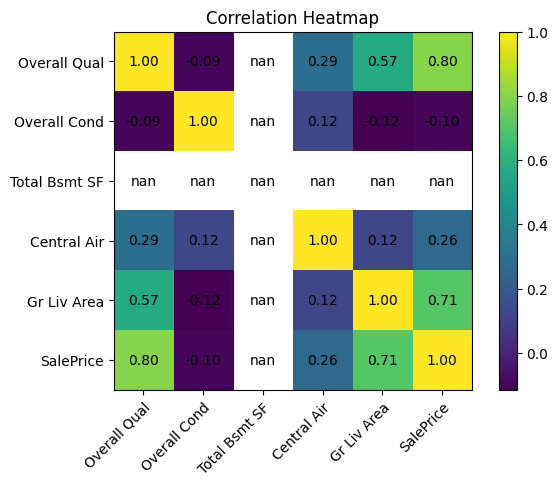

In [20]:
cm = np.corrcoef(df.values.T)
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)
plt.tight_layout()
plt.title('Correlation Heatmap')
plt.show()


Linear Regression from scratch

In [ ]:
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]   # w = w + eta * dL/dw   where   dL/dw = -2x(errors)/n 
            self.b_ += self.eta * 2.0 * errors.mean()               # b = b + eta * dL/db   where   dL/db = -2(errors)/n
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_   #z = w1x1 + w2x2 + ... + b
    
    def predict(self, X):
        return self.net_input(X)   

In [22]:
lr = LinearRegressionGD(eta=0.1)

In [25]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD(eta=0.1)
lr.fit(X_std, y_std)

plot of a linear regression model

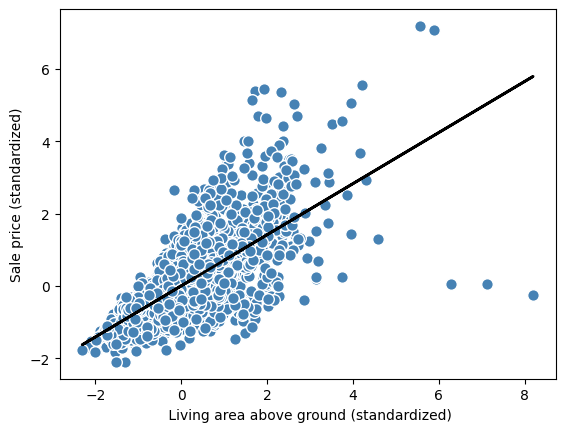

In [28]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)

lin_regplot(X_std,y_std, lr)
plt.xlabel(' Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')
plt.show()

Outliers can have a massive impact on linear regression models and cause them to be inaccurate sometimes. What is the solution to this problem? 

RANSAC(RAndom Sample Consensus)
This method helps us to fit the regression model to subsets of the data(the so called inliers) and hence our regression line isnt too affected by extreme outliers

In [4]:
ransac = RANSACRegressor(
    LinearRegression(),
    max_trials=100, #default is 100
    min_samples=0.95, 
    residual_threshold=None, #default is None
    random_state=123
)

In [ ]:
ransac.fit()